In [99]:
import pandas  # For data analytics
from datetime import datetime  # For date-based analysis.
import matplotlib.pyplot as plt
from pytz import UTC  # UTC Timezone
data = pandas.read_csv("reviews.csv", parse_dates=['Timestamp'])  # We import the dataframe and parse dates as a timestamp
data = data.drop("Unnamed: 3",axis=1) # Let us also polish unneeded columns or imperfections.
data = data.drop("Unnamed: 4",axis=1)
data = data.drop("Unnamed: 5",axis=1)
data = data.drop("Unnamed: 6",axis=1)

## Data Analytics ## 

### Mean, mode and general overview ###

In [100]:
data['Rating'].mean()  # We find the mean.

4.442155555555556

In [101]:
most_sold_product = data['Product Name'].mode()  # We find the mode, that is, the product that is found the most number of times.
print(f"The most sold product is {most_sold_product}")

The most sold product is 0    CoolZone Mega Cooler
Name: Product Name, dtype: object


In [102]:
megacooler_only = data[data['Product Name'] == 'CoolZone Mega Cooler']
megacooler_only.Rating.value_counts()  # We get a general overview on our most bought product.

5.0    18229
4.0     7122
4.5     6031
3.5     2167
3.0     1301
2.5      334
1.0      227
2.0      194
1.5       89
0.5        8
Name: Rating, dtype: int64

In [103]:
data[data['Product Name'] == 'CoolZone Mega Cooler']['Rating'].mean()  # We find the mean for said product

4.477270180942244

In [104]:
data['Day'] = data['Timestamp'].dt.date  # We're extracting the day for each timestamp for deeper insight to create an index.
day_avg = data.groupby(['Day']).mean()  # We extract the mean rating per the 'Day' index.
day_avg

,Rating
Day,
2018-01-01,4.532609
2018-01-02,4.122807
2018-01-03,4.360465
2018-01-04,4.531250
2018-01-05,4.423077
...,...
2021-03-29,4.240000
2021-03-30,4.428571
2021-03-31,4.453125


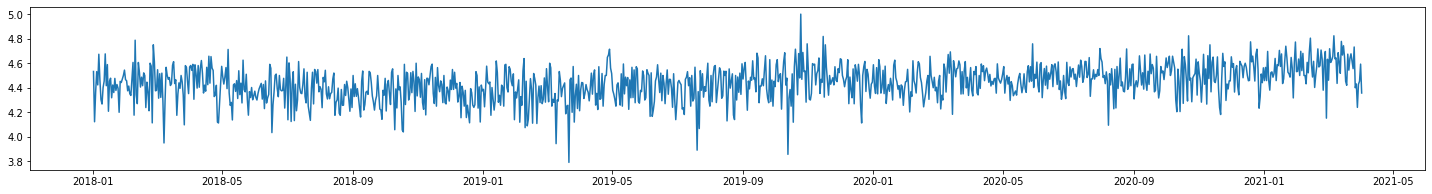

In [105]:

plt.figure(figsize=(25,3))  # We adjust the matplotlib figure for readability.
plt.plot(day_avg.index, day_avg['Rating'])  # We use the day as X axis and rating as Y axis. We input into matplotlib.

#### Improve our graph further by showing by week. ####

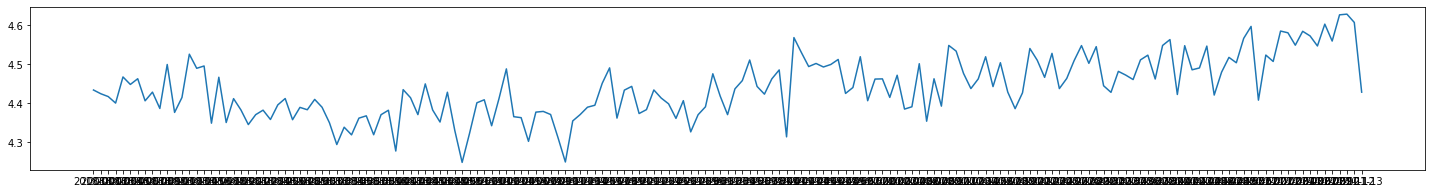

In [106]:
# The previous graph looks like it could be improved further by grouping our data into segmented information.
data['Week'] = data['Timestamp'].dt.strftime('%Y-%U')
week_avg = data.groupby(['Week']).mean()
plt.figure(figsize=(25,3))
plt.plot(week_avg.index, week_avg['Rating'])  # We can start to elucidate some form of upward slope, but we can improve.

## Average rating per month in general ##

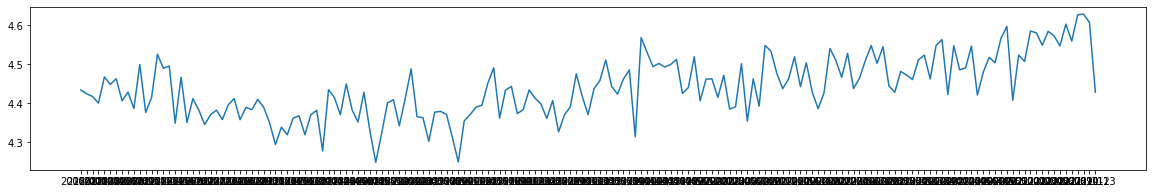

In [107]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%U')
month_avg = data.groupby(['Month']).mean()  # We remove some noise by grouping by month.
plt.figure(figsize=(20,3))
plt.plot(month_avg.index, month_avg['Rating'])  # We group by rating for more clear graph and better usability.

### Examine the average rating per month and considering the specific product ###

In [151]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%U')  # We can transition to a more active role of products in analysis.
month_avg_prod = data.groupby(['Month','Product Name']).mean().unstack()
month_avg_prod  # We start to see the relationship between product names, ratings, and the dates.

Rating                                  \
Product Name CoolZone Industrial CoolZone Legacy CoolZone Medium   
Month                                                              
2018-00                 3.928571        4.265957        4.583333   
2018-01                 3.900000        4.254545        4.107143   
2018-02                 4.571429        4.490566        4.166667   
2018-03                 4.409091        4.401786        4.083333   
2018-04                 4.500000        4.347458        4.562500   
...                          ...             ...             ...   
2021-09                 4.600000        4.357143        4.166667   
2021-10                 4.625000        3.500000        3.000000   
2021-11                 4.400000        4.500000        4.833333   
2021-12                 4.333333        4.625000        4.500000   
2021-13                 4.666667        4.400000        4.208333   

                                                                \
Product Name CoolZone Mega Cooler CoolZone Mini CoolZone NeoV2   
Month                                                            
2018-00                  4.464602           NaN       4.875000   
2018-01                  4.482699           NaN       4.428571   
2018-02                  4.416667           NaN       4.083333   
2018-03                  4.415842           NaN       4.700000   
2018-04                  4.507772           NaN       4.750000   
...                           ...           ...            ...   
2021-09                  4.607143      4.568966       3.000000   
2021-10                  4.693252      4.597222       3.833333   
2021-11                  4.662791      4.571429       4.750000   
2021-12                  4.625850      4.565789       5.000000   
2021-13                  4.495283      4.368421       3.750000   

                                                             
Product Name CoolZone PC-Cooler CoolZone Technicians Manual  
Month                                                        
2018-00                     NaN                    5.000000  
2018-01                     NaN                    4.333333  
2018-02                     NaN                    4.000000  
2018-03                     NaN                    4.285714  
2018-04                     NaN                    4.071429  
...                         ...                         ...  
2021-09                5.000000                    4.500000  
2021-10                4.833333                    4.000000  
2021-11                4.750000                    3.750000  
2021-12                     NaN                    5.000000  
2021-13                4.000000                         NaN  

[173 rows x 8 columns]

In [177]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%U')  # We can transition to a more active role of products in analysis.
month_avg_prod = data.groupby(['Month','Product Name']).count().unstack()  # By switching from mean to count, we improve.
month_avg_prod = data.groupby(['Month','Product Name'])['Rating'].count().unstack()
month_avg_prod


Product Name,CoolZone Industrial,CoolZone Legacy,CoolZone Medium,CoolZone Mega Cooler,CoolZone Mini,CoolZone NeoV2,CoolZone PC-Cooler,CoolZone Technicians Manual
Month,,,,,,,,
2018-00,7.0,47.0,12.0,226.0,NaN,4.0,NaN,2.0
2018-01,5.0,55.0,14.0,289.0,NaN,7.0,NaN,3.0
2018-02,7.0,53.0,9.0,246.0,NaN,6.0,NaN,1.0
2018-03,11.0,56.0,12.0,202.0,NaN,5.0,NaN,7.0
2018-04,5.0,59.0,16.0,193.0,NaN,2.0,NaN,7.0
...,...,...,...,...,...,...,...,...
2021-09,5.0,7.0,6.0,154.0,29.0,3.0,2.0,2.0
2021-10,4.0,5.0,1.0,163.0,36.0,3.0,3.0,1.0
2021-11,5.0,4.0,3.0,129.0,35.0,2.0,2.0,2.0


<AxesSubplot:xlabel='Month'>

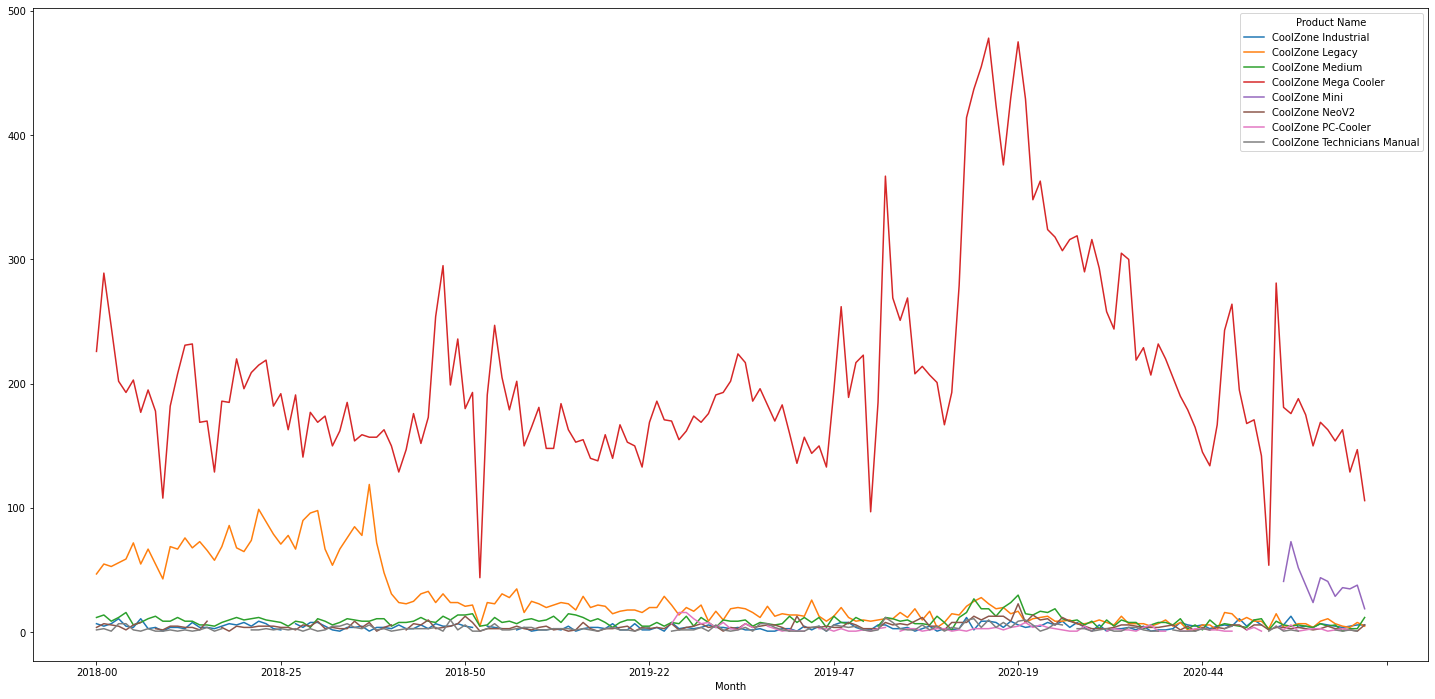

In [159]:
month_avg_prod.plot(figsize=(25,12))  # But the figure remains messy, so let's fix it, grouping only by rating.

#### Pie Chart overview #####

In [ ]:
product_share = data.groupby(['Product Name'])['Rating'].count()  # We use the pie chart to better visualize market share.
plt.pie(product_share, labels=product_share.index)  # We do have some metadata, this is useful for exploration but not for presentations.

###  BONUS : Comparing our reviews per day - is there a link? ###

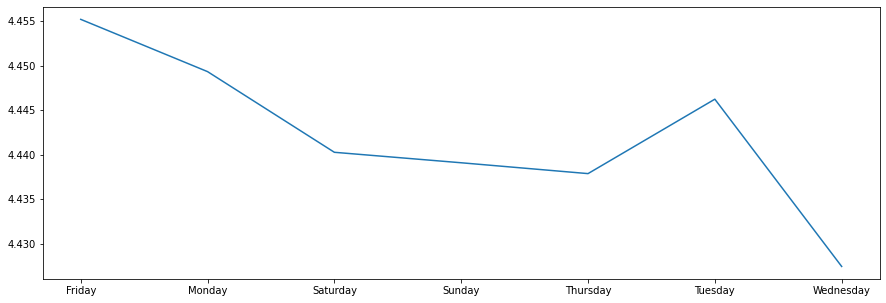

In [192]:
data['Weekday'] = data['Timestamp'].dt.strftime('%A') # We find the day by filtering using timestamp and strftime.
data['DayN'] = data['Timestamp'].dt.strftime('%w')
plt.figure(figsize=(15,5))
weekday_avg = data.groupby(['Weekday', 'DayN']).mean()  # Let's find the mean an dobserve it as a table
plt.plot(weekday_avg.index.get_level_values(0), weekday_avg['Rating']) # We grab the weekday index that is a string on x,
# And we grab the Y axis from the weekday average.
# We can observe a clear correlation between day of the week and rating.
